<a href="https://colab.research.google.com/github/nramrezmoreale/proyecto-properati-unicaba2025/blob/main/1_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Archivo cargado correctamente: entrenamiento.csv
Filas y columnas: (992192, 25)
Columnas disponibles:
 ['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency', 'price_period', 'title', 'description', 'property_type', 'operation_type', 'price']
Dataset limpio: (402763, 26)
Columnas finales: ['surface_total', 'rooms', 'bathrooms', 'price', 'price_per_m2']


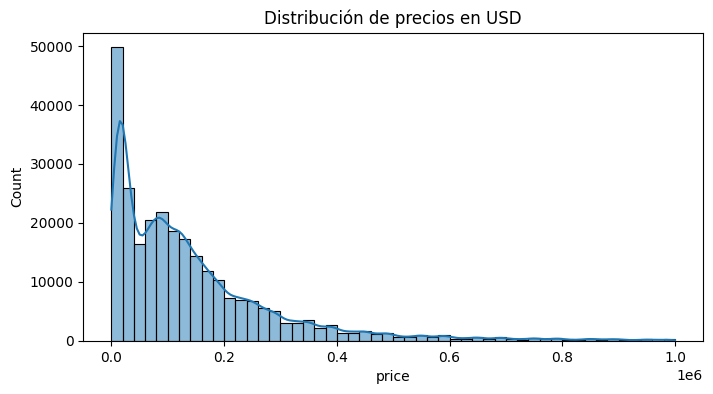

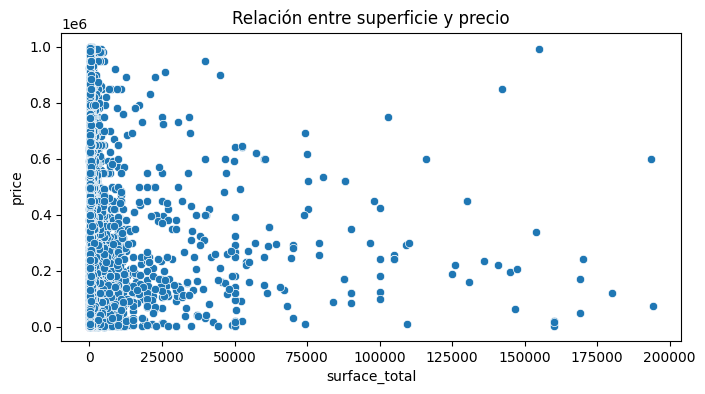

✅ Dataset limpio guardado en: data/processed/properati_clean.csv


In [4]:
# ======================================================
# 1. PREPROCESAMIENTO - PROYECTO PROPERATI ARGENTINA
# ======================================================
# Integrantes principales de este notebook:
# 1️⃣ Nicolás Paul Ramírez Moreale — Data Engineer (Carga y Limpieza)
# 2️⃣ Camila Funes — Feature Engineer (Transformación)
# ======================================================

# 🔹 Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ======================================================
# 1) CARGA DEL DATASET
# ======================================================
# Carga del archivo 'entrenamiento.csv' directamente desde la ruta en Colab
file_name = "entrenamiento.csv"
df = pd.read_csv(f"/content/{file_name}")

print("✅ Archivo cargado correctamente:", file_name)
print("Filas y columnas:", df.shape)
print("Columnas disponibles:\n", df.columns.tolist())

df.head()

# ======================================================
# 2) LIMPIEZA DE DATOS (Nicolás Paul)
# ======================================================
# - Eliminación de nulos
# - Filtro de precios razonables
# - Creación del campo price_per_m2

# Detectamos columnas de interés
col_precio = "price" if "price" in df.columns else ("price_aprox_usd" if "price_aprox_usd" in df.columns else "price_usd")
col_superficie = "surface_total" if "surface_total" in df.columns else "surface_total_in_m2"

df = df.dropna(subset=[col_precio, col_superficie])
df = df[(df[col_precio] > 0) & (df[col_precio] < 1_000_000)]
df = df[df[col_superficie] > 0]

# Nueva variable: precio por m2
df["price_per_m2"] = df[col_precio] / df[col_superficie]

print("Dataset limpio:", df.shape)
df.describe().T

# ======================================================
# 3) FEATURE ENGINEERING (Camila Funes)
# ======================================================
# - Selección de variables relevantes
# - Creación de nuevas features si aplica
# - División del dataset limpio

features = ["surface_total", "rooms", "bathrooms"]
target = col_precio

df = df[features + [target, "price_per_m2"]].dropna()
print("Columnas finales:", df.columns.tolist())

# ======================================================
# 4) VISUALIZACIÓN EXPLORATORIA
# ======================================================

plt.figure(figsize=(8,4))
sns.histplot(df[target], bins=50, kde=True)
plt.title("Distribución de precios en USD")
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="surface_total", y=target)
plt.title("Relación entre superficie y precio")
plt.show()

# ======================================================
# 5) GUARDADO DEL DATASET LIMPIO
# ======================================================
os.makedirs("data/processed", exist_ok=True)
clean_path = "data/processed/properati_clean.csv"
df.to_csv(clean_path, index=False)
print(f"✅ Dataset limpio guardado en: {clean_path}")